<a href="https://colab.research.google.com/github/AlexVonSchwerdtner/BA780-Team6/blob/main/Boston_Crime_Scene_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*BA780 - Team 6*
## Team Project - Exploratory Data Analysis

<img src="https://github.com/AlexVonSchwerdtner/BA780-Team6/blob/859eda2c400da728f46d9d541d23fb19c57805e3/Analyze%20Boston.png?raw=true" width="600" align="center"/>

*Image from [Analyze Boston](https://medium.com/news-stories-from-boston-open-data/official-launch-of-analyze-boston-coming-april-6th-b7513fd58aae)

---
#**Boston Crime Scene Analytics**
---

###*Problem definition:*

As current students living in the Boston Area we are interested in analyzing the Boston Crime Scene. We would like to analyze and discover what types of crimes are most common, where the different types of crimes are most likely to occur, and if the frequency of crimes change over specific time spans (e.g. day, week & year). Our mission is to answer questions like “where a person is most likely to be a victim of a crime at a certain time of day, specific months or seasons of a given year?”

## **Data**
*Crime Incident Reports (August 2015 - To Date)*

The Data was downloaded from [Analyze Boston](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system)

*Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.*

Each row represents a specific crime incident, each column contains crime incident attributes described as below:

**REVISE**

* **INCIDENT_NUMBER**: Customer ID
* **OFFENSE_CODE_GROUP**: OFFENSE_CODE_GROUP
* **OFFENSE_DESCRIPTION**: OFFENSE_DESCRIPTION
* **DISTRICT**: DISTRICT
* **REPORTING_AREA**: REPORTING_AREA
* **SHOOTING**: SHOOTING
* **OCCURRED_ON_DATE**: OCCURRED_ON_DATE **REVISE** changed to TIMESTAMP
* **YEAR**: YEAR
* **MONTH**: MONTH
* **DAY_OF_WEEK**: DAY_OF_WEEK
* **HOUR**: HOUR
* **UCR_PART**: UCR_PART
* **STREET**: STREET
* **Lat**: Lat
* **Long**: Long
* **Long**: Location

The data set includes information about:

* **EXPLANATION HOW WE TREAT YEARS 2015 & 2019 (incomplete DATA)**

* `xxx`


We will be using Python and Seaborn library to plot and analyze the data.

**Basic information**:

*Crime Dataset*
* 494,251 rows
* There are 20 columns
* **REVISE**

*Offense Codes Dataset*
* 425 rows
* There are 2 columns with Code and Name
* No missing values in this dataset
**REVISE**

*Holiday Dataset*
* 425 rows
* There are 2 columns with Code and Name
* No missing values in this dataset


# **Setup**

## *Importing Required Packages*

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
%matplotlib inline
pd.set_option('display.max_rows',5)
pd.set_option('display.max_columns',5)

## *Reading all files to the environment from GoogleCloudStorage Bucket*

In [104]:
from google.cloud import storage
from google.colab import auth
auth.authenticate_user()

In [105]:
def download_blob1(file_name):
    """Downloads a blob from the bucket."""
    project_id = 'ba-780-team6-a1'
    bucket_name = 'ba780-team6-a1'

    storage_client = storage.Client(project_id)

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(file_name)
    blob.download_to_filename(file_name)

    print(
        "Blob {} downloaded to {}.".format(
            file_name, file_name
        )
    )
download_blob1('rmsoffensecodes.xlsx')
download_blob1('crime-incident-reports-2015.csv')
download_blob1('crime-incident-reports-2016.csv')
download_blob1('crime-incident-reports-2017.csv')
download_blob1('crime-incident-reports-2018.csv')
download_blob1('crime-incident-reports-2019.csv')
download_blob1('crime-incident-reports-2020.csv')
download_blob1('crime-incident-reports-2021.csv')
download_blob1('US Holiday Dates (2004-2021).csv')

Blob rmsoffensecodes.xlsx downloaded to rmsoffensecodes.xlsx.
Blob crime-incident-reports-2015.csv downloaded to crime-incident-reports-2015.csv.
Blob crime-incident-reports-2016.csv downloaded to crime-incident-reports-2016.csv.
Blob crime-incident-reports-2017.csv downloaded to crime-incident-reports-2017.csv.
Blob crime-incident-reports-2018.csv downloaded to crime-incident-reports-2018.csv.
Blob crime-incident-reports-2019.csv downloaded to crime-incident-reports-2019.csv.
Blob crime-incident-reports-2020.csv downloaded to crime-incident-reports-2020.csv.
Blob crime-incident-reports-2021.csv downloaded to crime-incident-reports-2021.csv.
Blob US Holiday Dates (2004-2021).csv downloaded to US Holiday Dates (2004-2021).csv.


## *Loading Data to variables*

In [106]:
# reading the crime data sets to the environement
import pandas as pd
crimes2015 = pd.read_csv('crime-incident-reports-2015.csv')
crimes2016 = pd.read_csv('crime-incident-reports-2016.csv')
crimes2017 = pd.read_csv('crime-incident-reports-2017.csv')
crimes2018 = pd.read_csv('crime-incident-reports-2018.csv')
crimes2019 = pd.read_csv('crime-incident-reports-2019.csv')
crimes2020 = pd.read_csv('crime-incident-reports-2020.csv')
crimes2021 = pd.read_csv('crime-incident-reports-2021.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [107]:
# reading the offense codes to the environment
offense_codes = pd.read_excel('rmsoffensecodes.xlsx')

In [108]:
# reading the us holidays to the environment
holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')

## *Concatenating all crime datasets (Years 2015 - 2021)*

In [109]:
# concatenating all crime datasets
frames = [crimes2015,crimes2016,crimes2017,crimes2018,crimes2019,crimes2020,crimes2021]
Crimes_all_years = pd.concat(frames)
Crimes_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494281 entries, 0 to 50351
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      494281 non-null  object 
 1   OFFENSE_CODE         494281 non-null  int64  
 2   OFFENSE_CODE_GROUP   353253 non-null  object 
 3   OFFENSE_DESCRIPTION  494281 non-null  object 
 4   DISTRICT             491161 non-null  object 
 5   REPORTING_AREA       494281 non-null  object 
 6   SHOOTING             142483 non-null  object 
 7   OCCURRED_ON_DATE     494281 non-null  object 
 8   YEAR                 494281 non-null  int64  
 9   MONTH                494281 non-null  int64  
 10  DAY_OF_WEEK          494281 non-null  object 
 11  HOUR                 494281 non-null  int64  
 12  UCR_PART             353156 non-null  object 
 13  STREET               482395 non-null  object 
 14  Lat                  471751 non-null  float64
 15  Long              

In [110]:
# EXPORT TO CSV
Crimes_all_years.to_csv('crimes_all_years.csv')

# **Data Cleaning**

### Data Cleaning in Offense Code Dataset

In [111]:
# Number of unique offense codes
len(offense_codes['CODE'].unique())

425

In [112]:
# checking for duplicates
print(len(offense_codes))
print(len(offense_codes.drop_duplicates(subset='CODE', keep='first')))

576
425


In [113]:
offense_codes.duplicated

<bound method DataFrame.duplicated of      CODE                                       NAME
0     612           LARCENY PURSE SNATCH - NO FORCE 
1     613                        LARCENY SHOPLIFTING
..    ...                                        ...
574  2010                              HOME INVASION
575  1620  HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE

[576 rows x 2 columns]>

In [114]:
duplicated_codes = offense_codes[offense_codes.duplicated()]
duplicated_codes

,CODE,NAME
184,112,KILLING OF FELON BY POLICE
185,114,KILLING OF POLICE BY FELON
...,...,...
565,2608,CHINS
569,2631,PROPERTY - CONCEALING LEASED


### Data Cleaning in Crime Dataset

In [115]:
# Number of unique crime incidents
len(Crimes_all_years['INCIDENT_NUMBER'].unique())

452208

In [116]:
# checking for duplicates
print(len(Crimes_all_years))
print(len(Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first')))

494281
452208


In [117]:
# dropping duplicates
Crimes_all_years = Crimes_all_years.drop_duplicates(subset='INCIDENT_NUMBER', keep='first').reset_index()

In [118]:
# filling the NA's in the 'OFFENSE_CODE_GROUP' with non-na 'OFFENSE_CODE_GROUP' of the same 'OFFENSE_CODE' previously used
OFFENSE_CODE = Crimes_all_years[Crimes_all_years.OFFENSE_CODE_GROUP.isna()==False]
OFFENSE_CODE = OFFENSE_CODE.drop_duplicates(subset='OFFENSE_CODE', keep='first').reset_index()
OFFENSE_CODE = OFFENSE_CODE[['OFFENSE_CODE','OFFENSE_CODE_GROUP']]
Crimes_all_years = Crimes_all_years.merge(OFFENSE_CODE,on='OFFENSE_CODE')
Crimes_all_years['OFFENSE_CODE_GROUP']=Crimes_all_years.OFFENSE_CODE_GROUP_y
Crimes_all_years = Crimes_all_years.drop(columns=['OFFENSE_CODE_GROUP_x','OFFENSE_CODE_GROUP_y'])
Crimes_all_years[Crimes_all_years.YEAR==2019]

,index,INCIDENT_NUMBER,...,Location,OFFENSE_CODE_GROUP
9070,57,202042514,...,"(42.2975553295965, -71.0597091024257)",Other
9071,81,202028826,...,"(42.3618385665647, -71.0597648909416)",Other
...,...,...,...,...,...
442071,17934,192081188,...,"(42.3438608818475, -71.0362377090198)",Harbor Related Incidents
442276,7240,192095576,...,"(0, 0)",Prostitution


In [119]:
Crimes_all_years.isna().sum()

index                 0
INCIDENT_NUMBER       0
                     ..
Location              0
OFFENSE_CODE_GROUP    0
Length: 18, dtype: int64

In [120]:
print(len(Crimes_all_years))

442397


In [121]:
# missing values in Lat column
Crimes_all_years[Crimes_all_years['Lat'].isnull()]

,index,INCIDENT_NUMBER,...,Location,OFFENSE_CODE_GROUP
6,185,I162034813,...,"(0.00000000, 0.00000000)",Other
26,540,I162000990,...,"(0.00000000, 0.00000000)",Other
...,...,...,...,...,...
442366,5545,I182099934,...,"(0.00000000, 0.00000000)",HUMAN TRAFFICKING
442384,88836,I172013557,...,"(0.00000000, 0.00000000)",Manslaughter


In [122]:
# missing values in Long column
Crimes_all_years[Crimes_all_years['Long'].isnull()]

,index,INCIDENT_NUMBER,...,Location,OFFENSE_CODE_GROUP
6,185,I162034813,...,"(0.00000000, 0.00000000)",Other
26,540,I162000990,...,"(0.00000000, 0.00000000)",Other
...,...,...,...,...,...
442366,5545,I182099934,...,"(0.00000000, 0.00000000)",HUMAN TRAFFICKING
442384,88836,I172013557,...,"(0.00000000, 0.00000000)",Manslaughter


In [123]:
# missing values in DISTRICT column
Crimes_all_years[Crimes_all_years['DISTRICT'].isnull()]

,index,INCIDENT_NUMBER,...,Location,OFFENSE_CODE_GROUP
289,9868,I152097601,...,"(0.00000000, 0.00000000)",Other
1361,49958,I152053474,...,"(0.00000000, 0.00000000)",Other
...,...,...,...,...,...
442146,45423,212006631,...,"(42.3438608818475, -71.0362377090198)",Harbor Related Incidents
442148,48911,212001938,...,"(42.3438608818475, -71.0362377090198)",Harbor Related Incidents


In [124]:
# add SEASON column
Crimes_all_years['SEASON']=None
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([3,4,5]),'SEASON']='Spring'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([6,7,8]),'SEASON']='Summer'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([9,10,11]),'SEASON']='Fall'
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([12,1,2]),'SEASON']='Winter'

In [150]:
# Transform OCCURRED_ON_DATE from str to timestemp
def date(time):
    return time.date()
Crimes_all_years['OCCURRED_ON_DATE']=pd.to_datetime(Crimes_all_years['OCCURRED_ON_DATE'],format='%Y-%m-%d %H:%M:%S')
Crimes_all_years['OCCURRED_ON_DATE']=Crimes_all_years['OCCURRED_ON_DATE'].apply(date)
Crimes_all_years['OCCURRED_ON_DATE']




In [ ]:
# EXPLAIN
holidays = holidays[['Date','Holiday']]
holidays['Date'] = pd.to_datetime(holidays['Date'],format='%Y-%m-%d')
holidays['Date']=holidays['Date'].apply(date)
Crimes_all_years = Crimes_all_years.merge(holidays, left_on='OCCURRED_ON_DATE',right_on='Date',how='outer')

In [151]:
crime_holiday=Crimes_all_years.groupby('Holiday').agg('count')
crime_holiday

,index,INCIDENT_NUMBER,...,SEASON,Date
Holiday,,,,,
4th of July,1274,1274,...,1274,1286
Christmas Day,771,771,...,771,783
...,...,...,...,...,...
Washington's Birthday,951,951,...,951,964
Western Easter,883,883,...,883,896


In [152]:
Crimes_all_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442859 entries, 0 to 442858
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                442624 non-null  float64
 1   INCIDENT_NUMBER      442624 non-null  object 
 2   OFFENSE_CODE         442624 non-null  float64
 3   OFFENSE_DESCRIPTION  442624 non-null  object 
 4   DISTRICT             439787 non-null  object 
 5   REPORTING_AREA       442624 non-null  object 
 6   SHOOTING             131910 non-null  object 
 7   OCCURRED_ON_DATE     442624 non-null  object 
 8   YEAR                 442624 non-null  float64
 9   MONTH                442624 non-null  float64
 10  DAY_OF_WEEK          442624 non-null  object 
 11  HOUR                 442624 non-null  float64
 12  UCR_PART             311337 non-null  object 
 13  STREET               432505 non-null  object 
 14  Lat                  423327 non-null  float64
 15  Long             

# **Exploration**

## General

In [157]:
dftop6 = Crimes_all_years.groupby('OFFENSE_CODE_GROUP').size().to_frame('count').sort_values(by='count', ascending=False).head(6).reset_index()
dftop6 = dftop6.drop([5])
dftop6

,OFFENSE_CODE_GROUP,count
0,Motor Vehicle Accident Response,58293
1,Larceny,38894
2,Medical Assistance,33484
3,Investigate Person,30794
4,Vandalism,22092


In [158]:
# number of crimes over offense groups by year

df = Crimes_all_years.groupby(['YEAR','OFFENSE_CODE_GROUP'])['INCIDENT_NUMBER'].count().reset_index()
df = df.sort_values(by=['YEAR','INCIDENT_NUMBER'], ascending=False)
df = df[df['OFFENSE_CODE_GROUP'].isin(dftop6.OFFENSE_CODE_GROUP)]

df[df['YEAR']==2020]

,YEAR,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
338,2020.0,Motor Vehicle Accident Response,8409
330,2020.0,Larceny,6250
327,2020.0,Investigate Person,5122
335,2020.0,Medical Assistance,4256
357,2020.0,Vandalism,3420


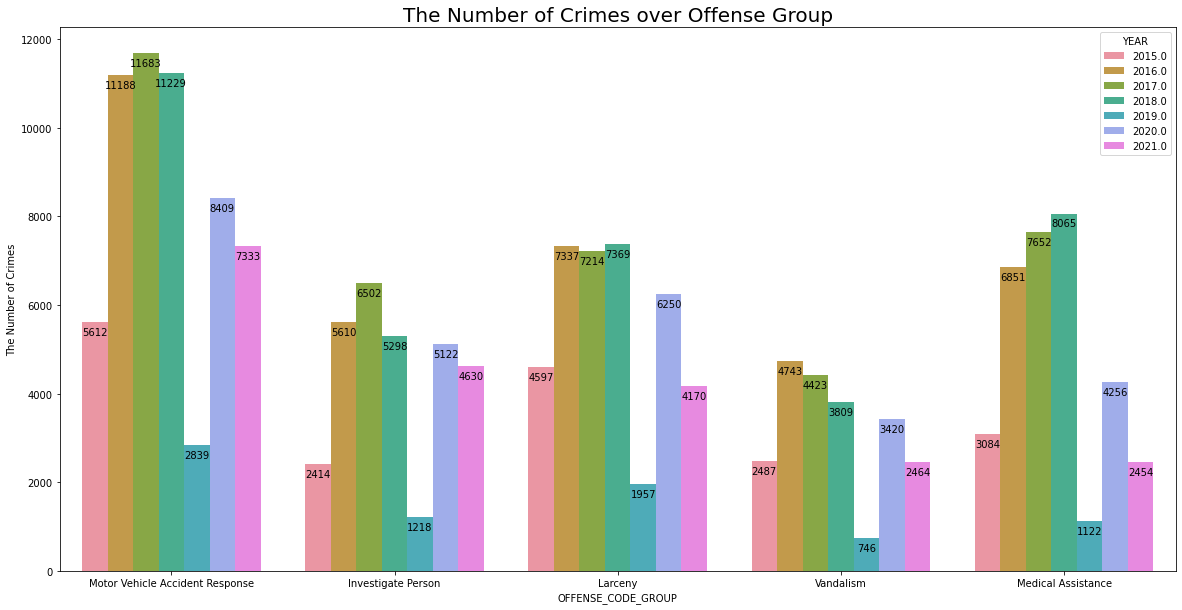

In [159]:
plt.figure(figsize= (20,10))
fig1 = sns.barplot(data=df, x='OFFENSE_CODE_GROUP', y='INCIDENT_NUMBER', hue='YEAR')
plt.ylabel('The Number of Crimes')
plt.title('The Number of Crimes over Offense Group', fontsize=20)

for i in fig1.patches:
    fig1.annotate(format(int(i.get_height())), 
                   (i.get_x() + i.get_width() / 2, i.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    
plt.show()

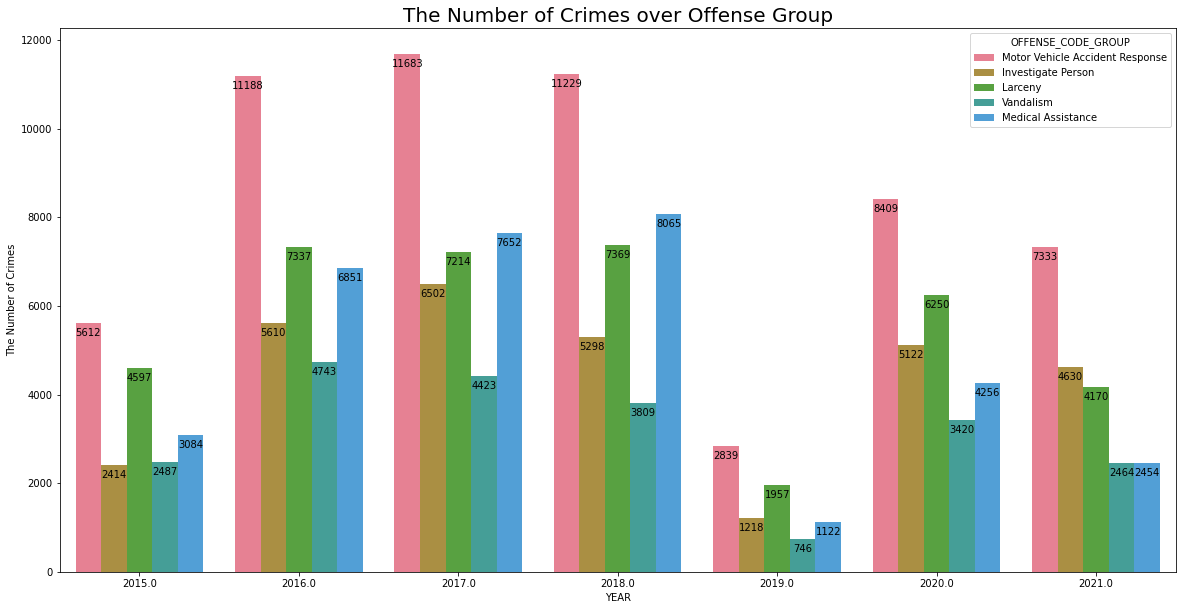

In [160]:
plt.figure(figsize= (20,10))
fig2 = sns.barplot(data=df, x='YEAR', y='INCIDENT_NUMBER', hue='OFFENSE_CODE_GROUP')
plt.ylabel('The Number of Crimes')
plt.title('The Number of Crimes over Offense Group', fontsize=20)

for i in fig2.patches:
    fig2.annotate(format(int(i.get_height())), 
                   (i.get_x() + i.get_width() / 2, i.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
    
plt.show()

## By Hour and Weekday

###During which time do criminal cases frequently occur？

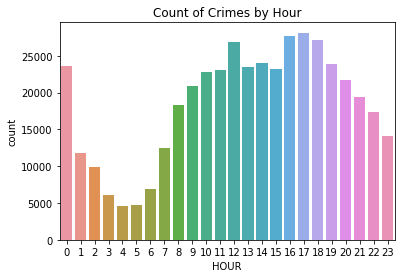

In [133]:
crimes_hour = Crimes_all_years.groupby('HOUR').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
ax = sns.barplot(data=crimes_hour,x='HOUR',y='count')
sns.set_palette('husl')
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Hour');


###Did this pattern vary a lot in different years?

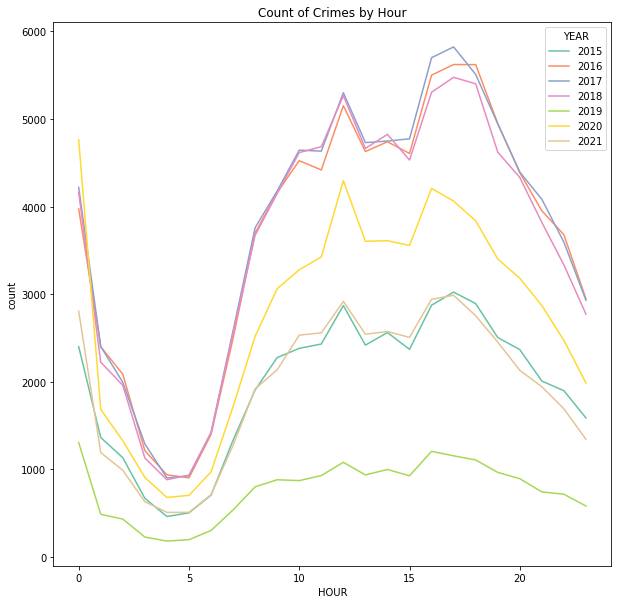

In [134]:
crimes_hour = Crimes_all_years.groupby(['HOUR','YEAR']).size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
ax = sns.lineplot(data=crimes_hour,x='HOUR',y='count',hue='YEAR',palette='Set2')
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Hour');

###During which day of week do criminal cases frequently occur？

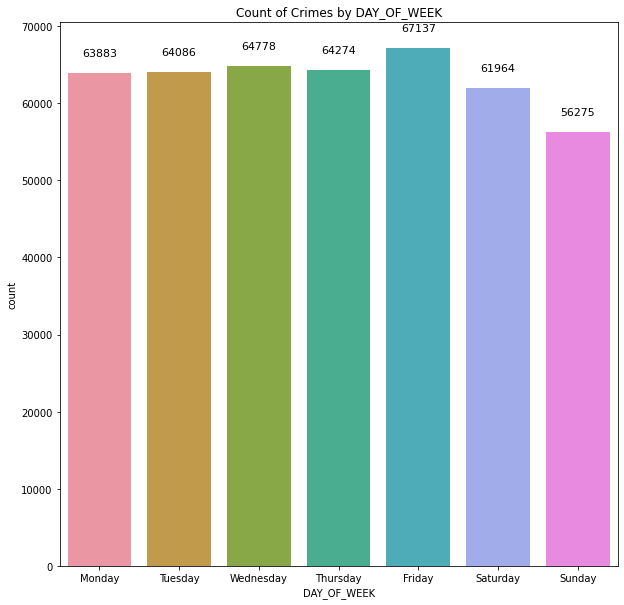

In [135]:
crimes_weekday = Crimes_all_years.groupby('DAY_OF_WEEK').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()
crimes_weekday = crimes_weekday.reindex([4,3,1,2,0,5,6])
sns.set_palette('husl')
ax = sns.barplot(data=crimes_weekday,x='DAY_OF_WEEK',y='count')
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by DAY_OF_WEEK')
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points');

###Did this pattern vary a lot in different years?

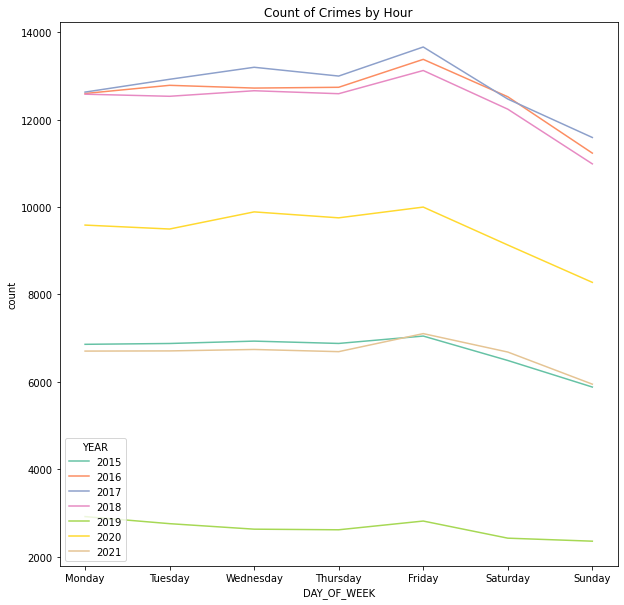

In [136]:
crimes_weekday = Crimes_all_years.groupby(['DAY_OF_WEEK','YEAR']).size().to_frame('count')
def sort():
    weekday= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    YEAR = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
    return [(i,j) for i in weekday for j in YEAR]
crimes_weekday = crimes_weekday.reindex(sort())
ax = sns.lineplot(data=crimes_weekday,x='DAY_OF_WEEK',y='count',hue='YEAR',palette='Set2')
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Hour');

###What were the most dangerous hours on certain days of a week?

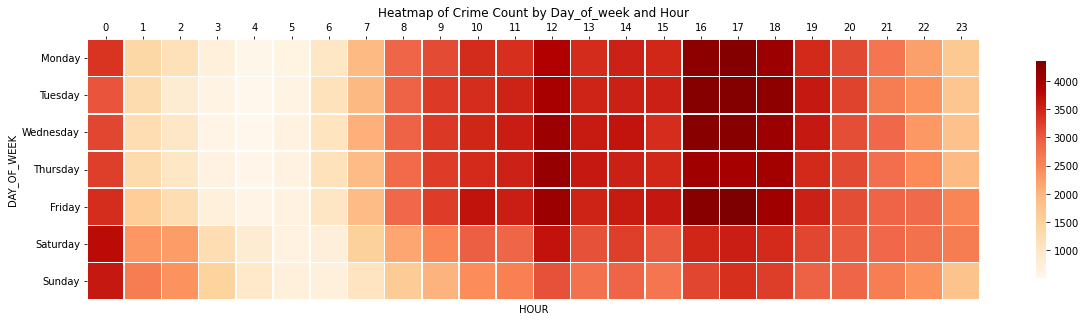

In [137]:
crimes_weekday_hour = Crimes_all_years.groupby(['DAY_OF_WEEK','HOUR']).INCIDENT_NUMBER.aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Day_of_week and Hour');

## By Season

###Which season had the most crimes?

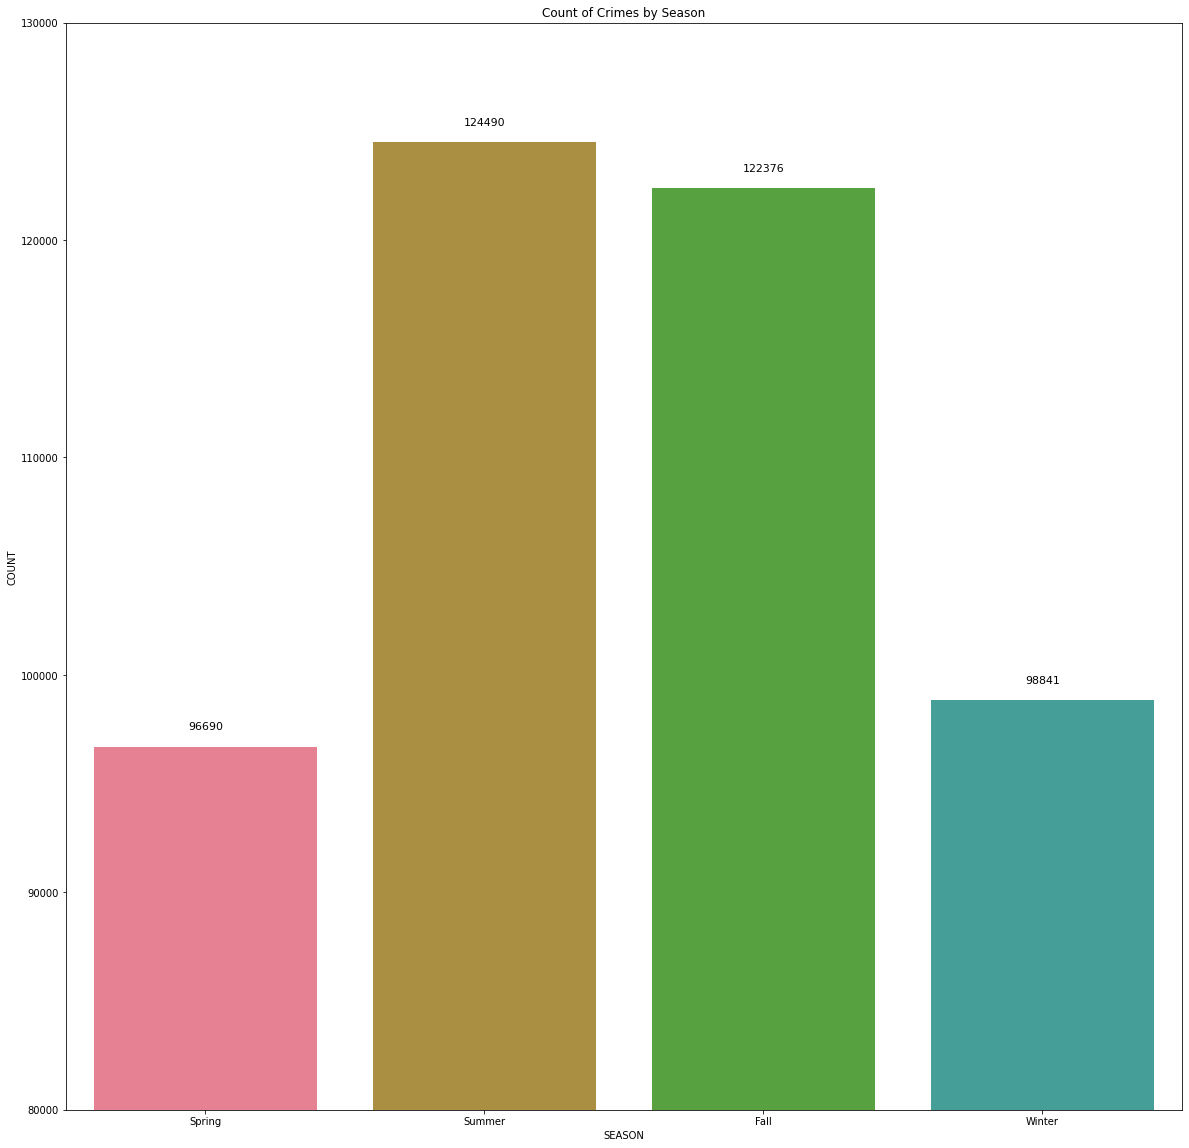

In [138]:
crimes_season = Crimes_all_years.groupby('SEASON')['index'].agg(count='count')
crimes_season = crimes_season.reindex(['Spring','Summer','Fall','Winter'])
crimes_season = pd.DataFrame({'SEASON':crimes_season.index,'COUNT':crimes_season['count']})
ax = sns.barplot(x=crimes_season.SEASON,y=crimes_season.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(80000, 130000))
sns.set_context({"figure.figsize":(10,10)})
ax.set_title('Count of Crimes by Season');

###What were the most dangerous hours in a specific season?

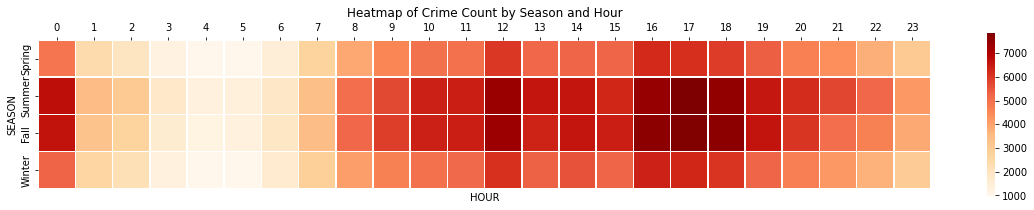

In [139]:
crimes_season_hour = Crimes_all_years.groupby(['SEASON','HOUR']).INCIDENT_NUMBER.aggregate('count').unstack()
crimes_season_hour = crimes_season_hour.reindex(['Spring','Summer','Fall','Winter'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_season_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.15}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Crime Count by Season and Hour');

## By Year

###A general overview of crime cases in different years

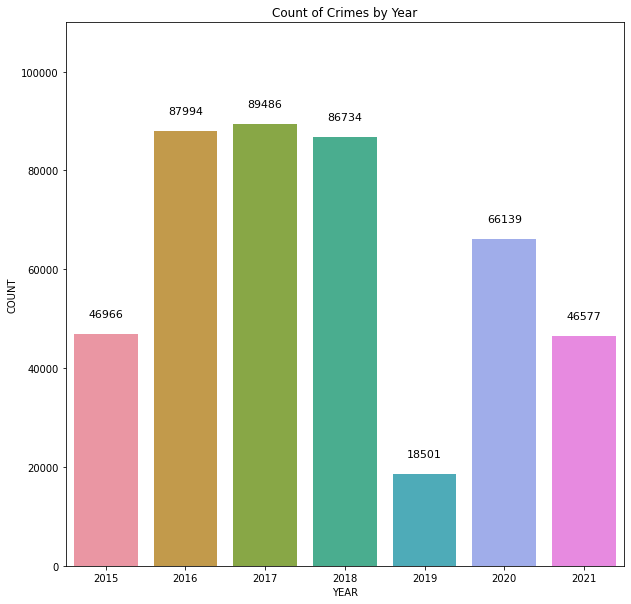

In [140]:
crimes_year = Crimes_all_years.groupby('YEAR').INCIDENT_NUMBER.agg(count='count')
crimes_year = pd.DataFrame({'YEAR':crimes_year.index,'COUNT':crimes_year['count']})
sns.set_context({"figure.figsize":(10,10)})
ax = sns.barplot(x=crimes_year.YEAR,y=crimes_year.COUNT)
for p in ax.patches:
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                textcoords='offset points')
ax.set(ylim=(0, 110000))
ax.set_title('Count of Crimes by Year');

## By Offense Type

###What were the most commonly occurred crimes?

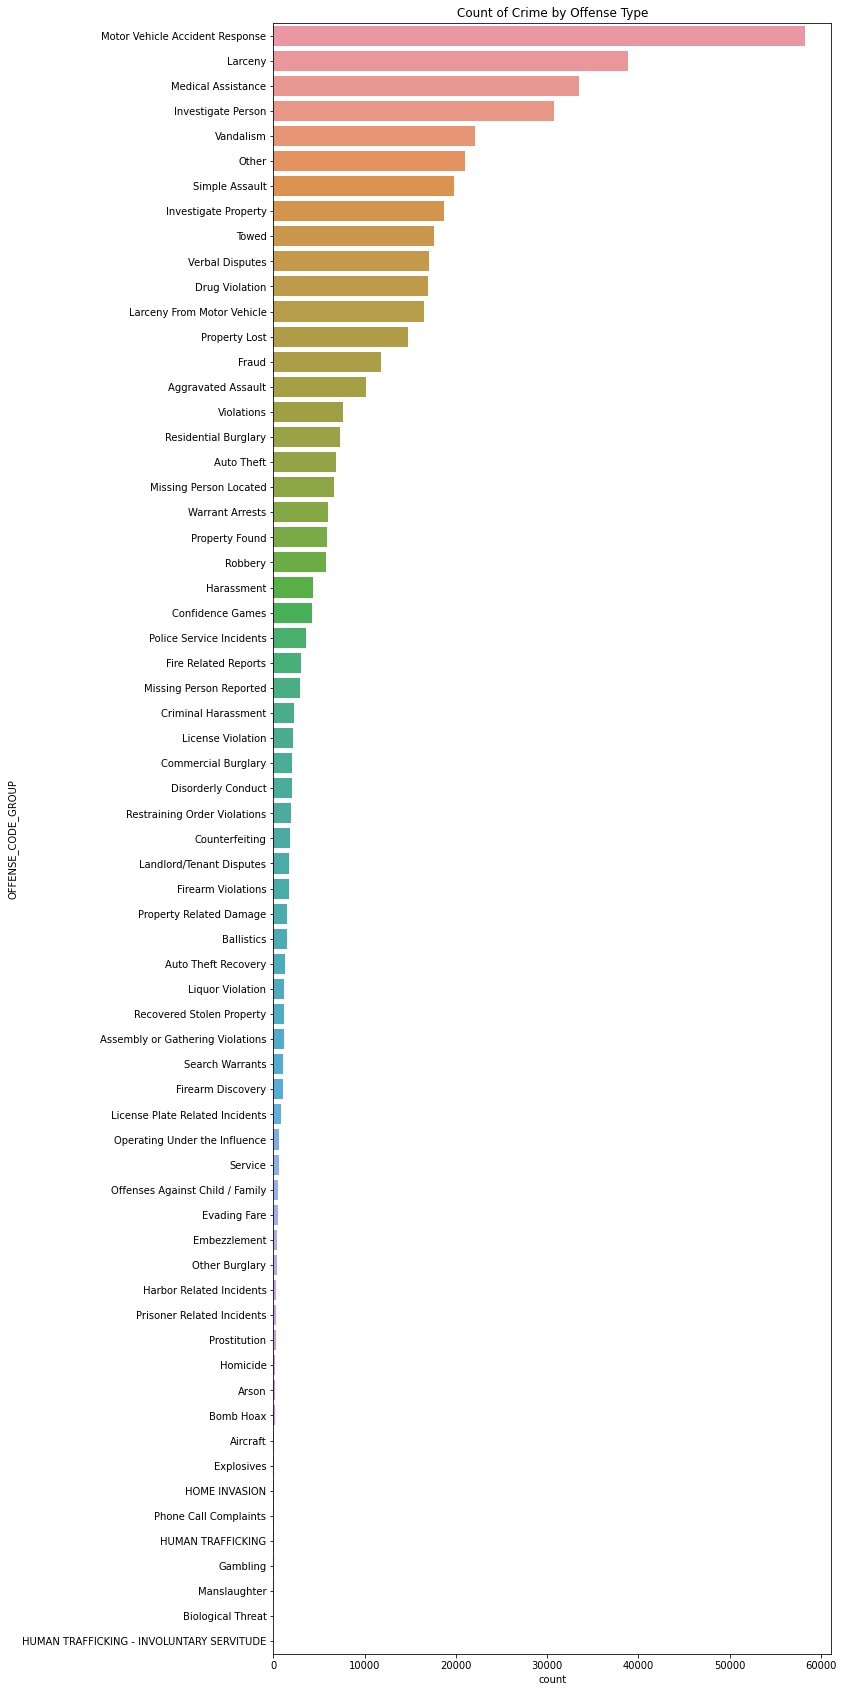

In [141]:

crimes_offense = Crimes_all_years.groupby('OFFENSE_CODE_GROUP').size().to_frame('count').sort_values(by='count', ascending=False).reset_index()

sns.set_context({"figure.figsize":(10,30)})
ax = sns.barplot(data=crimes_offense,y='OFFENSE_CODE_GROUP',x='count');
ax.set_title('Count of Crime by Offense Type');

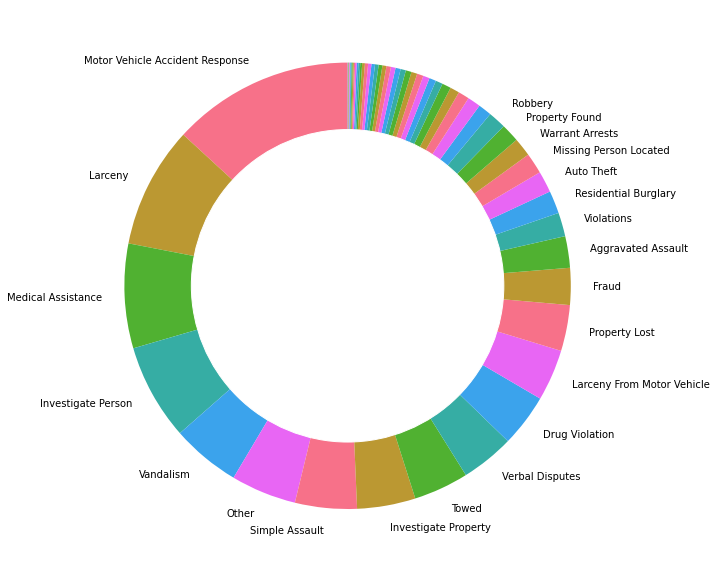

In [142]:

crimes_offense = Crimes_all_years.groupby('OFFENSE_CODE_GROUP')['index'].agg(COUNT='count').sort_values(by='COUNT',ascending=False)
crimes_offense = pd.DataFrame({'LAB':'','COUNT':crimes_offense['COUNT']})
crimes_offense.loc[crimes_offense.COUNT/sum(crimes_offense.COUNT) > 0.01,'LAB'] = crimes_offense[crimes_offense.COUNT/sum(crimes_offense.COUNT) > 0.01].index
plt.pie(crimes_offense.COUNT, labels=list(crimes_offense.LAB),startangle=90, labeldistance=1.1);
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

###Motor Vehicle Accidents, the most frequent case type, were more likely to be reported at what time?

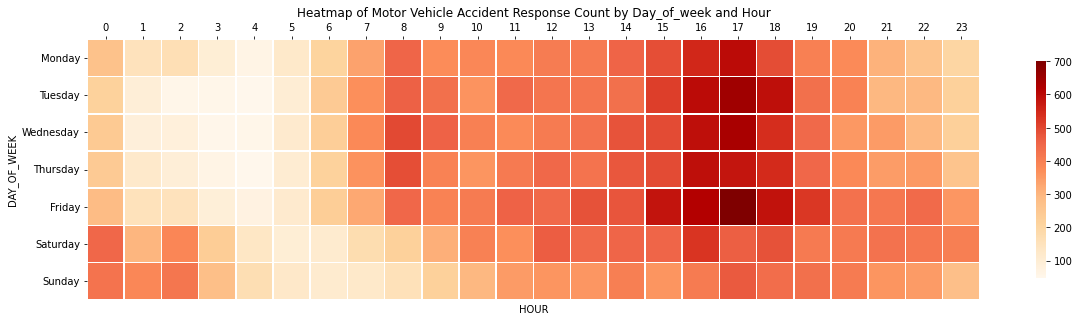

In [143]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Motor Vehicle Accident Response Count by Day_of_week and Hour');

###Larceny, the second frequent case type, were more likely to be reported at what time?

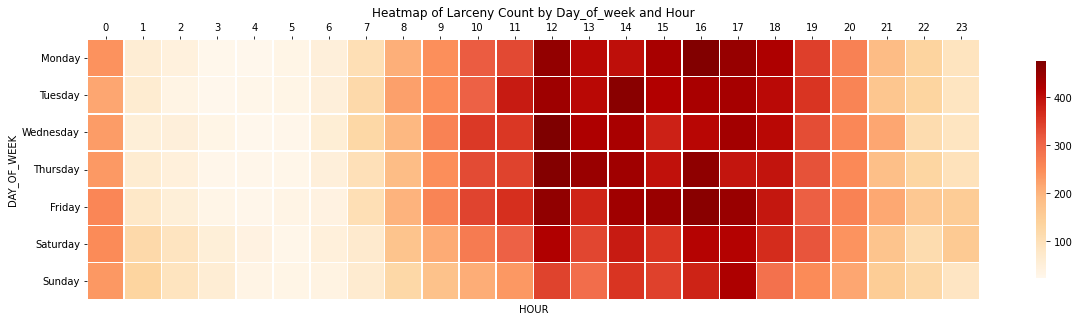

In [144]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Larceny'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Larceny Count by Day_of_week and Hour');

###Larceny, the second frequent case type, were more likely to be reported at what time?

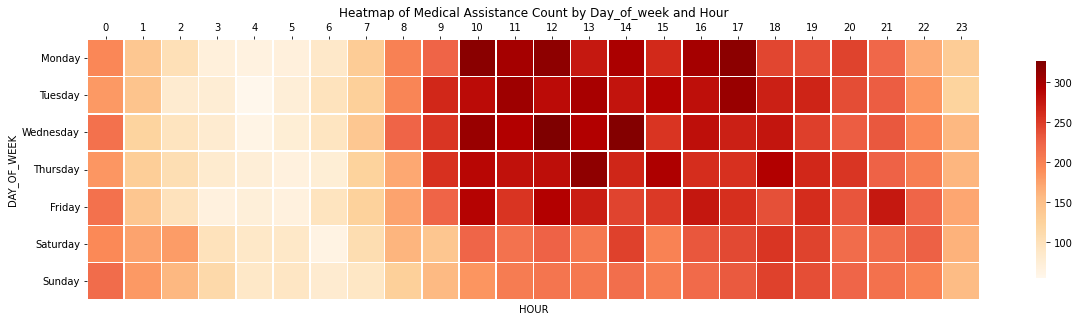

In [145]:
crimes_weekday_hour = Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Medical Assistance'].groupby(['DAY_OF_WEEK','HOUR'])['index'].aggregate('count').unstack()
crimes_weekday_hour = crimes_weekday_hour.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.set_context({"figure.figsize":(20,20)})
ax = sns.heatmap(crimes_weekday_hour,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of Medical Assistance Count by Day_of_week and Hour');

In [146]:
#Offense_group = Crimes_all_years['OFFENSE_CODE'].value_counts()
new = Crimes_all_years[['OFFENSE_CODE','YEAR','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION']].copy()

In [147]:
grouped_df = new.groupby("OFFENSE_CODE")

grouped_df = grouped_df.agg({"YEAR": "nunique"})

grouped_df = grouped_df.reset_index()

In [148]:
grouped_df

,OFFENSE_CODE,YEAR
0,111,7
1,121,2
...,...,...
200,3830,7
201,3831,7


Line Chart

In [149]:
sns.set_context({"figure.figsize":(10,10)})
sns.lineplot(data=crimes_district_year,x='YEAR',y='COUNT',hue='DISTRICT');

NameError: ignored

## Analysis on Street

###Top 10 frequent streets

In [ ]:
street_rank = Crimes_all_years.groupby('STREET').INCIDENT_NUMBER.agg(count='count').sort_values(by='count',ascending=False)[:10]
street_rank

###Motor Vehicle Accident were more likely to occur on which street？

In [ ]:
Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Motor Vehicle Accident Response'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

###Larceny were more likely to occur on which street？

In [ ]:
Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Larceny'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

###Medical Assistance cases were more likely to occur on which street？

In [ ]:
Crimes_all_years[Crimes_all_years['OFFENSE_CODE_GROUP'] == 'Medical Assistance'].groupby('STREET')['index'].agg(count='count').sort_values(by='count',ascending=False).head(5)

## Analysis on District 

In [ ]:
#gm=pd.DataFrame({'District':Crime_all_years['DISTRICT'],'Year':Crime_all_years['YEAR']})
#ax=gm.groupby(['District','Year']).agg({'Year':'count'})
#ap = ax.unstack(level=0).plot(kind='line', subplots=True, rot=0, layout=(7,2) )
#plt.tight_layout()

In [ ]:
crimes_weekday_hour = Crimes_all_years.groupby(['HOUR','YEAR'])['index'].aggregate(COUNT = 'count')
sns.set_context({"figure.figsize":(10,10)})
ax = sns.lineplot(data=crimes_weekday_hour,x='HOUR',y='COUNT',hue='YEAR');

In [ ]:

crimes_District_year = Crimes_all_years.groupby(['DISTRICT','YEAR'])['index'].aggregate('count').unstack()
crimes_District_year = crimes_District_year.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_year,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Year')

In [ ]:

crimes_District_month = Crimes_all_years.groupby(['DISTRICT','MONTH'])['index'].aggregate('count').unstack()
crimes_District_month = crimes_District_year.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_month,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Month')

In [ ]:

crimes_District_season = Crimes_all_years.groupby(['DISTRICT','SEASON'])['index'].aggregate('count').unstack()
crimes_District_season = crimes_District_season.reindex(['B2', 'C11', 'A1', 'E18', 'D4', 'B3', 'C6', 'D14', 'A7', 'E5',
       'E13', 'A15', 'External'])
ax = sns.heatmap(crimes_District_season,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by Season')


In [ ]:

crimes_District_weeksdays = Crimes_all_years.groupby(['DAY_OF_WEEK','DISTRICT'])['index'].aggregate('count').unstack()
crimes_District_weeksdays = crimes_District_weeksdays.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax = sns.heatmap(crimes_District_weeksdays,square=True,annot=False,fmt="d",cmap="OrRd",linewidths=0.5,cbar_kws={"shrink": 0.2}) 
ax.xaxis.tick_top()
ax.set_title('Heatmap of District by day of week')

In [ ]:
Crimes_all_years['Holiday']=None
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([12]),'Holiday']=1
Crimes_all_years.loc[Crimes_all_years['MONTH'].isin([1,2,3,4,5,6,7,8,9,10,11]),'Holiday']=0
Crime_all_years.info()

In [ ]:
mydate=Crime_all_years['OCCURRED_ON_DATE']
DATE = []

for date in mydate:
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    DATE.append([year, month, day])
    

Crime_all_years['DATE']=DATE

Holiday=[]

month=Crime_all_years['MONTH']
day=Crime_all_years['DAY']
for var in month:
  if var ==12:
   for d in day:
     if d == 24:
      Holiday.append(1)
     else:
      Holiday.append(0)


## Mark Cluster Map

In [ ]:
df=pd.read_csv("/content/crimes_all_years.csv")

In [ ]:
df1 = df.sort_values(by='DISTRICT').reset_index()

In [ ]:
limit = 200
df1 = df1.iloc[0:limit, :]

In [ ]:
df1=df1.dropna(subset=['Long'])
df=df.dropna(subset=['Lat'])

In [ ]:
df1= df1[df1.Lat != 0.0]
df1

In [ ]:
df1[df1.Long==0.0]
df1[df1.Lat==0.0]

In [ ]:
latitude = 42.3601
longitude = -71.0589
boston_map = folium.Map(location=[latitude, longitude], zoom_start=12)
boston_map

In [ ]:
incidents = folium.map.FeatureGroup()
for lat, lng, in zip(df1.Lat, df1.Long):
 incidents.add_child(
 folium.CircleMarker(
 [lat, lng],
 radius=5, 
 color='yellow',
 fill=True,
 fill_color='blue',
 fill_opacity=0.6
 )
)
boston_map.add_child(incidents)

In [ ]:
incidents = folium.map.FeatureGroup()
for lat, lng, code,year in zip(df1.Lat, df1.Long,df1.OFFENSE_CODE_GROUP,df1.YEAR):
 incidents.add_child(
 folium.CircleMarker(
 [lat, lng],
 radius=5, 
 color='yellow',
 fill=True,
 fill_color='red',
 fill_opacity=0.6
   )
 )
latitudes = list(df1.Lat)
longitudes = list(df1.Long)
labels = list(df1.OFFENSE_CODE_GROUP)
years=list(df1.YEAR)
for lat, lng, labels,year in zip(latitudes, longitudes, labels,years):
  folium.Marker([lat, lng], popup='{}, {}'.format(labels,year)).add_to(boston_map) 
 

boston_map.add_child(incidents)
 

In [ ]:
from folium import plugins
boston_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
incidents = plugins.MarkerCluster().add_to(boston_map)
for lat, lng, label,year in zip(df1.Lat, df1.Long, df1.OFFENSE_CODE_GROUP,df1.YEAR):
 folium.Marker(
 location=[lat, lng],
 icon=None,
 popup='{}, {}'.format(label,year),
 ).add_to(incidents)
# display map
boston_map